好用工具：

* https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference

注意事項：
* 如果畫圖出現中文亂碼：https://blog.csdn.net/fwj_ntu/article/details/105598145

# 套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
from scipy import stats

In [2]:
occupation_dict = {
    1: "營造／礦砂業",
    2: "製造業",
    3: "水電燃氣業",
    4: "批發／零售／貿易商",
    5: "旅宿／餐飲",
    6: "運輸倉儲",
    7: "農／林／漁／牧",
    8: "金融保險",
    9: "不動產／租賃",
    10: "軍／警／消",
    11: "公務人員",
    12: "律師／會計師／地政士",
    13: "醫藥服務",
    14: "休閒服務",
    15: "其他／家管",
    16: "自由業",
    17: "投資／自營商",
    18: "媒體文教",
    19: "學生",
    20: "學校教師（含行政人員）",
    21: "資訊科技",
    22: "公證人或記帳士",
    23: "國防工業",
    24: "投資或稅務顧問公司",
    25: "不動產仲介／代銷商",
    26: "大宗物資貿易商",
    27: "博弈業（網路／實體）",
    28: "八大特種行業",
    29: "宗教、慈善、基金會",
    30: "銀樓、珠寶商",
    31: "藝術品或古董買賣商",
    32: "當鋪",
    33: "實體或虛擬貨幣兌換所"
}

In [9]:
# 選擇你要的欄位
selected_columns = [
    
    # yes/no
    'sex',
    'isReject',
    'hasOtherComAccount',

    # categorical
    # 'bid',
    'source',
    'occupation',
    # 'company',
    'eduLevel',

    # numerical-like
    'expInvestment', 
    'yrsInvestment', 
    'frqInvestment',
    'srcCapital',
    'quotaCredit',
    'incomeYear',
    'totalWealth',
    
    # 'quota_origin',
    'quota_now'
]


data = pd.read_csv('./data/data.csv') # 載入資料
data = data[selected_columns] # 選擇欄位
data = data.dropna() # 移除空值列
data = data[selected_columns]
data = data[data['quota_now']<=1e6]
data = data[data['isReject']==0]
data = data.drop('isReject', axis=1)
data = data[data['source']!='Anue']
data = data[data['occupation'] <= 33]
data = data.dropna()

In [12]:
def to_class(x):
    '''
    0~10萬
    10~30萬(不含10萬)
    30~50萬(不含30萬)
    50~100萬(不含50萬)
    '''
    if x < 1E5:
        return 0
    if 1E5 <= x and x < 3E5:
        return 1
    if 3E5 <= x and x < 5E5:
        return 2
    else:
        return 3

In [18]:
yushan = data[data['source'] == '玉證']
fugle = data[data['source'] == 'FUGLE']
yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))

<ipython-input-18-dbf60cbdc3f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
<ipython-input-18-dbf60cbdc3f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))


# 分析data

## 各欄位分佈

<ipython-input-22-28fef06665a7>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax, bins=20)


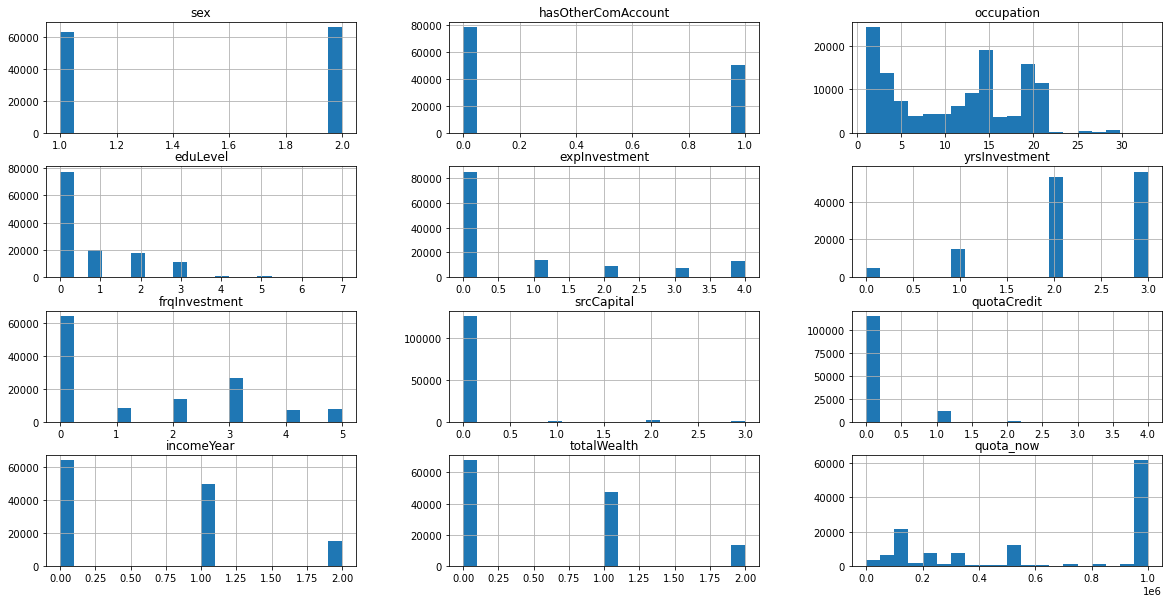

<ipython-input-22-28fef06665a7>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yushan.hist(ax=ax, bins=20)


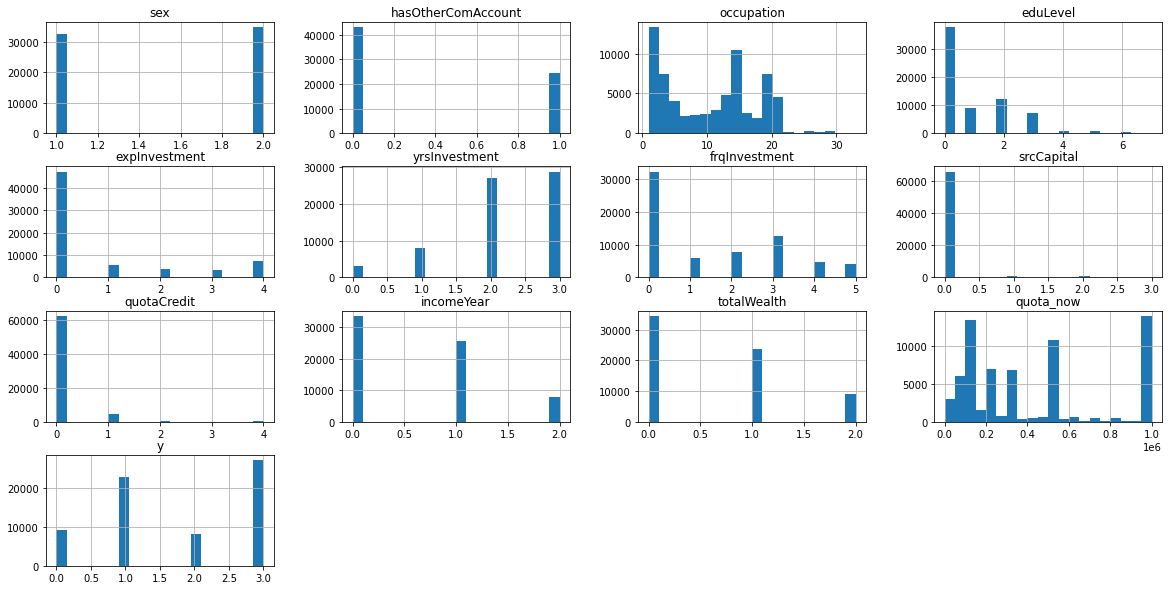

<ipython-input-22-28fef06665a7>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fugle.hist(ax=ax, bins=20)


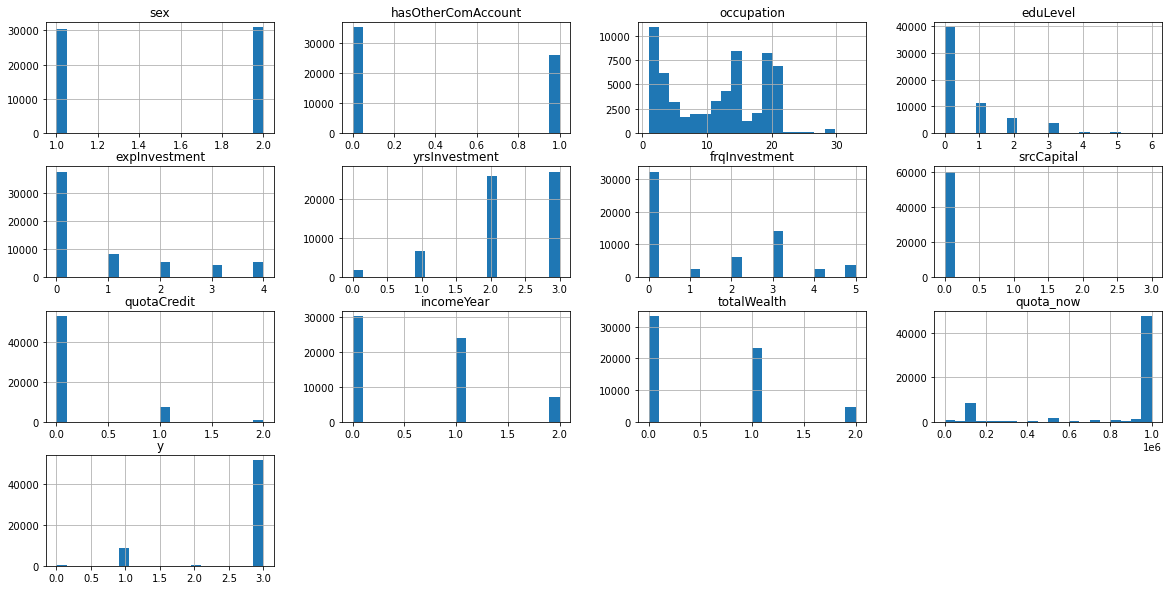

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
data.hist(ax=ax, bins=20)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(20, 10))
yushan.hist(ax=ax, bins=20)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(20, 10))
fugle.hist(ax=ax, bins=20)
plt.show()
plt.close()

## 產業 v.s. 開戶

In [6]:
pd.pivot_table(data=data, index="occupation", columns="source", values="quota_now", aggfunc=['count', 'mean', 'std'])

count              mean                   std           
source      FUGLE     玉證      FUGLE         玉證      FUGLE         玉證
occupation                                                          
不動產仲介／代銷商     127    210  95.275591  52.528571  18.347474  36.276208
不動產／租賃        401    629  96.820449  49.313196  13.739275  35.468549
休閒服務         2322   2802  96.307494  35.852962  14.760393  32.553635
八大特種行業         34     59  89.382353  25.203390  26.837349  23.100067
公務人員         2799   2432  96.734905  46.398026  13.062741  34.879971
公證人或記帳士        63     82  88.190476  39.597561  29.735315  34.845642
其他／家管        6088   7597  49.147832  41.049362  42.854917  34.348960
博弈業（網路／實體）     27     48  72.962963  30.437500  40.174122  29.294474
國防工業           61     51  94.016393  33.411765  20.017069  29.977442
大宗物資貿易商        30     27  90.000000  51.111111  26.652295  36.083592
媒體文教         1686   1339  96.705219  43.700523  13.399510  35.295940
學校教師（含行政人員）  2612   2881  96.587289  46.019091  14.418900  35.999865
學生           5600   4570  25.110893  23.956236  32.132595  28.912738
宗教、慈善、基金會     375    326  85.909333  39.165644  30.965692  34.168949
實體或虛擬貨幣兌換所      7     10  74.285714  32.900000  43.915503  21.126340
律師／會計師／地政士    535    453  94.084112  47.649007  20.414030  37.063005
批發／零售／貿易商    5644   6906  96.447201  43.030264  14.223746  35.784893
投資或稅務顧問公司      77     61  93.454545  56.508197  21.468181  37.255703
投資／自營商        384    537  91.291667  53.795158  24.094859  35.882620
旅宿／餐飲        3223   4055  95.899473  33.744513  15.688042  32.178497
水電燃氣業         470    541  96.310638  39.210721  14.610118  32.526342
營造／礦砂業       1568   1829  96.056760  41.628759  14.814271  33.790017
當鋪              4     11  95.000000  28.909091  10.000000  12.283766
自由業          1216   2527  60.990954  39.650178  43.219384  34.232963
藝術品或古董買賣商      23     28  83.956522  40.571429  35.790398  30.899393
製造業          9210  11394  96.295005  39.945147  14.098345  33.622982
資訊科技         6857   4587  96.653055  47.271855  13.279255  35.975182
軍／警／消        1580   1742  95.367722  37.579219  16.106347  32.696949
農／林／漁／牧       293    431  95.382253  50.222738  17.151539  36.368994
運輸倉儲         1396   1689  95.996418  37.943162  15.099692  33.047830
醫藥服務         4310   4743  96.150580  44.946447  14.682825  36.691075
金融保險         1948   2336  96.175051  48.481592  13.833133  35.503893
銀樓、珠寶商         22     48  90.681818  44.916667  27.268308  37.796112

## 相關性分析

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


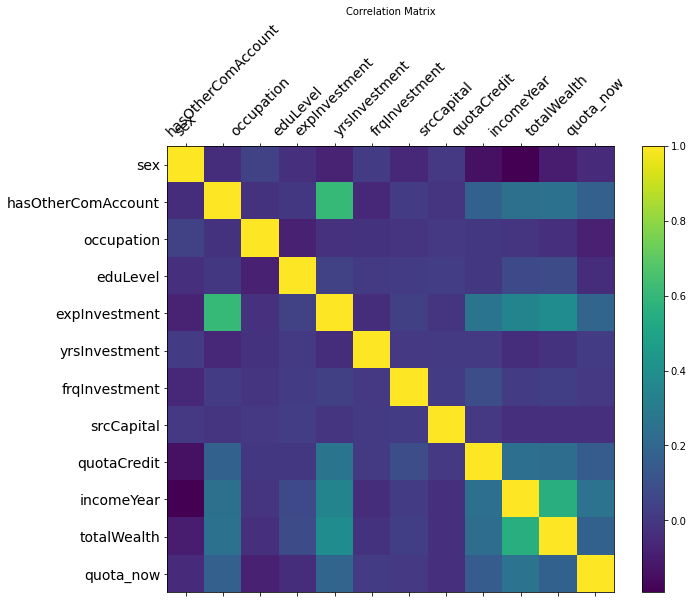

In [23]:
# pearson coefficient
corr = data.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

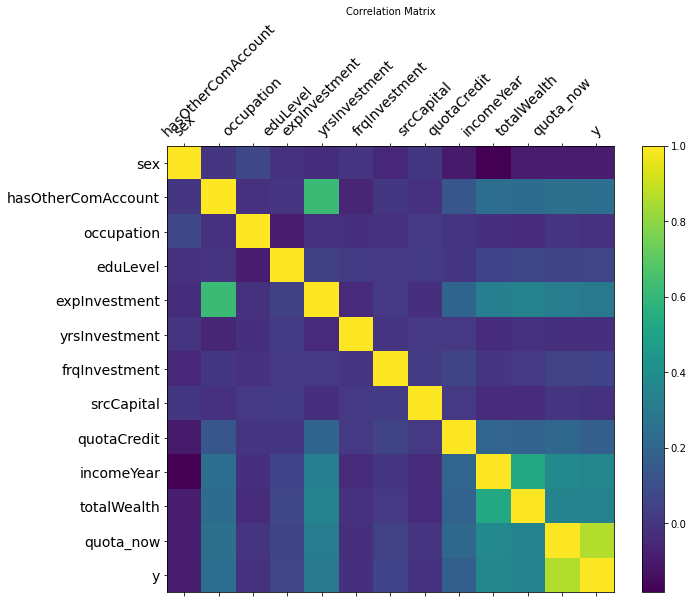

In [24]:
# pearson coefficient
corr = yushan.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(yushan.corr(), fignum=f.number)
plt.xticks(range(yushan.select_dtypes(['number']).shape[1]), yushan.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(yushan.select_dtypes(['number']).shape[1]), yushan.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

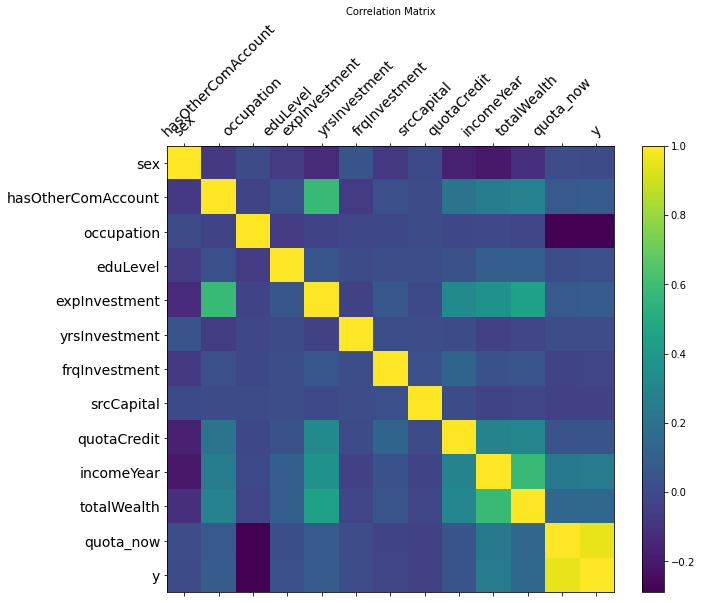

In [28]:
# pearson coefficient
corr = fugle.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(fugle.corr(), fignum=f.number)
plt.xticks(range(fugle.select_dtypes(['number']).shape[1]), fugle.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(fugle.select_dtypes(['number']).shape[1]), fugle.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

## 各欄位 v.s. quota_now

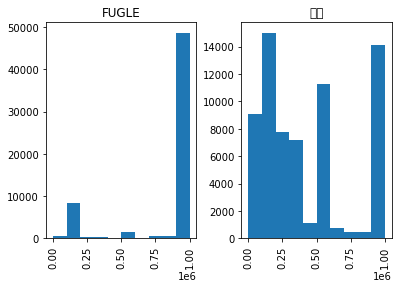

In [33]:
data.hist(column='quota_now', by='source')
plt.show()
plt.close()

/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/pandas/plotting/_matplotlib/hist.py:396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


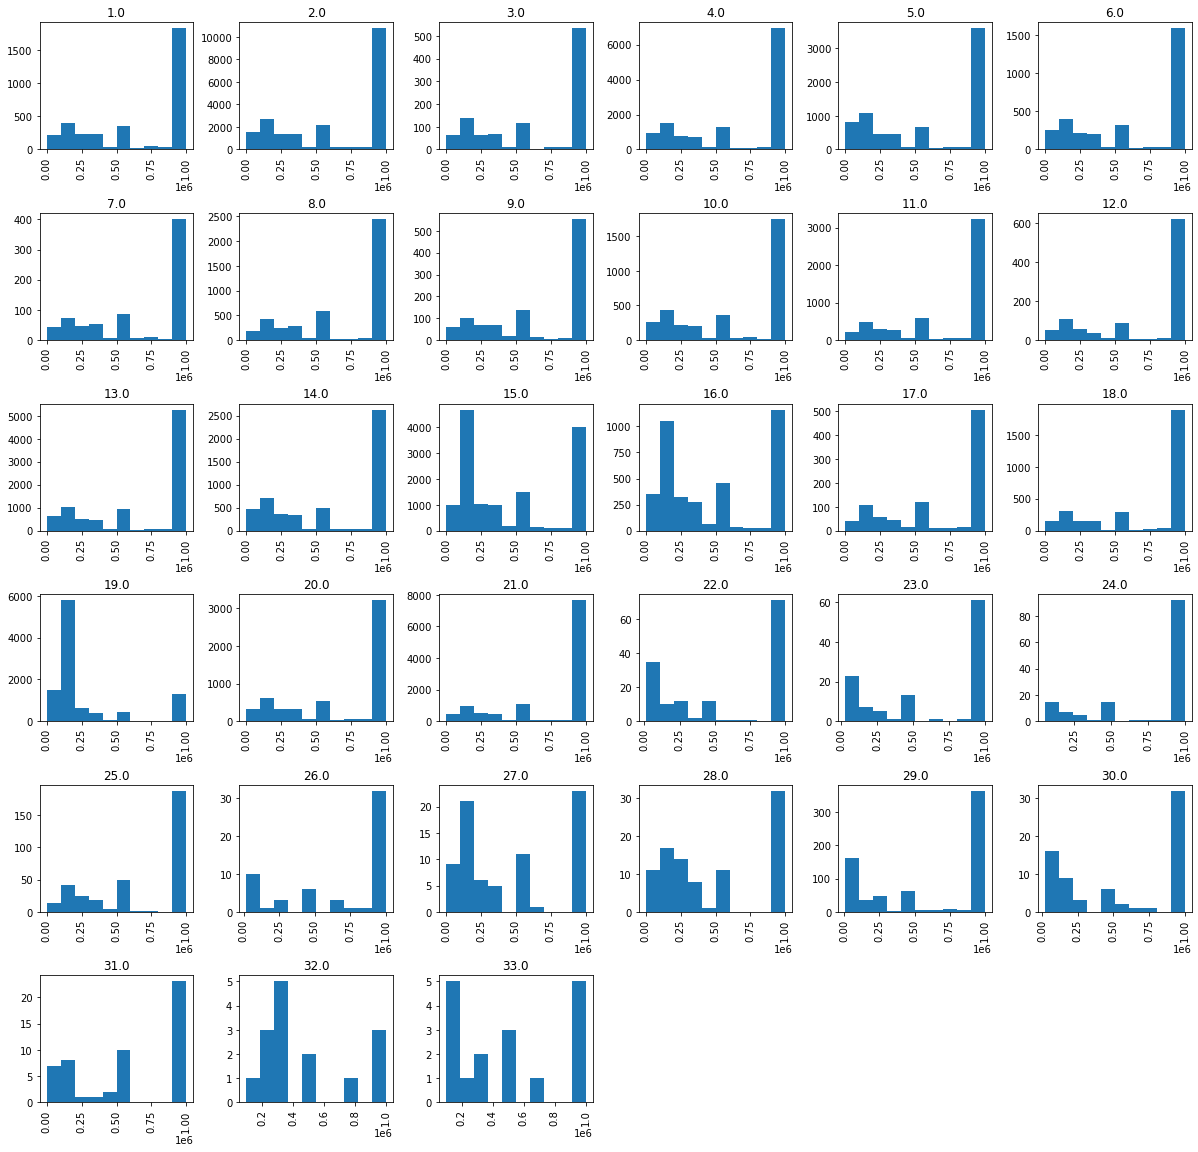

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
data.hist(column='quota_now', by='occupation', ax=ax)
plt.show()
plt.close()

# 分析credit

In [10]:
names = [
    '身分證號',
    '分公司代碼',
    '違約',
    '普通戶開戶數',
    '信用戶開戶數',
    '疑似洗錢註記',
    '融資總餘額-萬元',
    '融券總餘額-萬元',
    '單日買賣最高額度-萬',
    '期貨市場開戶數',
    '借貸款項契約數',
    '現股當沖開戶數']
credit = pd.read_csv('./data/credit.csv', names=names, skiprows=1)
# credit = pd.read_csv('./data/credit.csv')
credit

,,身分證號,分公司代碼,違約,普通戶開戶數,信用戶開戶數,疑似洗錢註記,融資總餘額-萬元,融券總餘額-萬元,單日買賣最高額度-萬,期貨市場開戶數,借貸款項契約數,現股當沖開戶數
140289368C,884AZ,2021-12-14,20211214,N,1,0,0,0,0,N,0,0,0
190354142C,884Z,2022-01-18,20220118,N,0,0,0,0,0,N,0,0,0
170393481C,884Y,2021-12-03,20211203,N,1,0,0,0,200,N,0,1,1
170431289C,884W,2021-09-09,20210909,N,0,0,0,0,0,N,0,0,0
142005435C,884AZ,2022-01-20,20220120,N,0,0,0,0,0,N,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202050304A,884X,2021-09-02,20210902,N,1,0,0,0,300,N,0,0,0
242050504A,884AZ,2021-04-21,20210420,N,3,0,0,0,1048,N,0,0,1
160003957A,884AZ,2021-06-08,20210607,N,1,0,0,0,100,N,0,0,1
120015869A,884AZ,2021-04-09,20210408,N,0,0,0,0,0,N,0,0,0


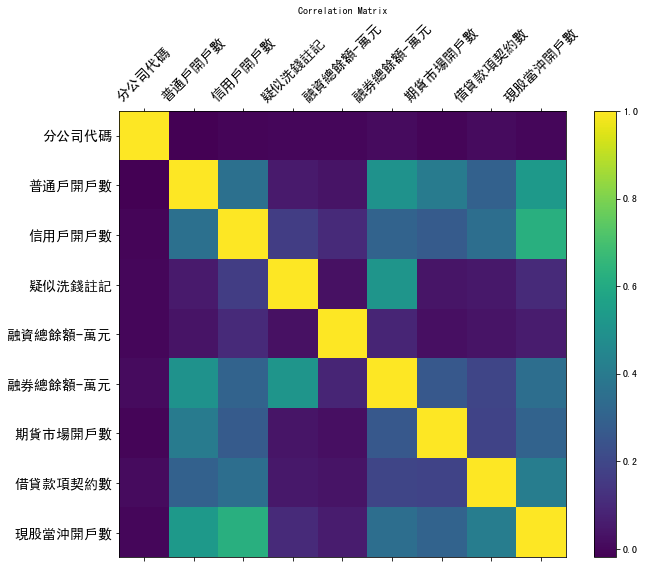

In [11]:
# pearson coefficient
corr = credit.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(credit.corr(), fignum=f.number)
plt.xticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(credit.select_dtypes(['number']).shape[1]), credit.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

#  資料預處理

In [41]:
yushan = data[data['source'] == '玉證']
fugle = data[data['source'] == 'FUGLE']
yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))
fugle = fugle.drop('source', axis=1)
yushan = yushan.drop('source', axis=1)
fugle = fugle.drop('quota_now', axis=1)
yushan = yushan.drop('quota_now', axis=1)
fugle = fugle.drop('occupation', axis=1)
yushan = yushan.drop('occupation', axis=1)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# ---------------------------------------------------------------------------- #
#                                     fugle                                    #
# ---------------------------------------------------------------------------- #

X_fugle = fugle.iloc[:, :-1].values
Y_fugle = fugle.iloc[:, -1].values

# apply SelectKBest class to extract top 10 best features
top_k = 10
bestfeatures = SelectKBest(score_func=chi2, k=top_k)
fit = bestfeatures.fit(X_fugle, Y_fugle)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(fugle.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([df_columns, df_scores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(top_k, 'Score'))  # print 10 best feature
print('-'*80)
fugle_feature_list = featureScores.nlargest(3, 'Score')['Specs'].values

# ---------------------------------------------------------------------------- #
#                                    yushan                                    #
# ---------------------------------------------------------------------------- #

X_yushan = yushan.iloc[:, :-1].values
Y_yushan = yushan.iloc[:, -1].values

# apply SelectKBest class to extract top 10 best features
top_k = 10
bestfeatures = SelectKBest(score_func=chi2, k=top_k)
fit = bestfeatures.fit(X_yushan, Y_yushan)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(yushan.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([df_columns, df_scores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(top_k, 'Score'))  # print 10 best feature
print('-'*80)
yushan_feature_list = featureScores.nlargest(5, 'Score')['Specs'].values

print(f'fugle = {fugle_feature_list}')
print(f'yushan = {yushan_feature_list}')

fugle = fugle[fugle_feature_list]
yushan = yushan[yushan_feature_list]

                Specs        Score
8          incomeYear  3046.659980
9         totalWealth  1185.513889
3       expInvestment  1060.705797
1  hasOtherComAccount   285.231559
7         quotaCredit   240.450611
6          srcCapital   155.688288
5       frqInvestment   103.805693
2            eduLevel    92.486061
0                 sex     4.284493
4       yrsInvestment     4.268197
--------------------------------------------------------------------------------
                Specs         Score
3       expInvestment  14765.605073
8          incomeYear   6719.128930
9         totalWealth   6201.735876
7         quotaCredit   2721.594000
1  hasOtherComAccount   2700.693377
2            eduLevel    465.985879
5       frqInvestment    432.761672
0                 sex     88.615019
6          srcCapital     37.542479
4       yrsInvestment     11.782742
--------------------------------------------------------------------------------
fugle = ['incomeYear' 'totalWealth' 'expInvestment']
yush

<ipython-input-41-8d135945cd10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yushan['y'] = yushan['quota_now'].apply(lambda x: to_class(x))
<ipython-input-41-8d135945cd10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fugle['y'] = fugle['quota_now'].apply(lambda x: to_class(x))


In [72]:
from sklearn.model_selection import train_test_split
X_train_fugle, X_valid_fugle, Y_train_fugle, Y_valid_fugle = train_test_split(X_fugle, Y_fugle, test_size=0.33)
X_train_yushan, X_valid_yushan, Y_train_yushan, Y_valid_yushan = train_test_split(X_yushan, Y_yushan, test_size=0.33)

In [83]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_fugle, Y_train_fugle)
pred = clf.predict(X_valid_fugle)
(sum(np.equal(pred, Y_valid_fugle)))/len(Y_valid_fugle)

0.8413459163002125

In [79]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train_yushan, Y_train_yushan)
pred = clf.predict(X_valid_yushan)
(sum(np.equal(pred, Y_valid_yushan)))/len(Y_valid_yushan)

0.5047764960346071

# Linear Regression

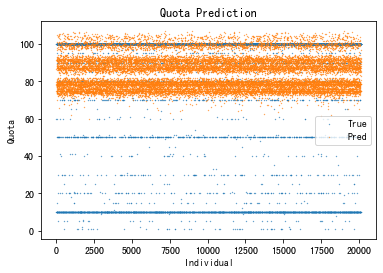

0.223239186592134

In [199]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_fugle, Y_train_fugle)
Y_pred_fugle = model.predict(X_valid_fugle)
plt.scatter(range(len(Y_pred_fugle)), Y_valid_fugle, s=0.1, label='True')
plt.scatter(range(len(Y_pred_fugle)), Y_pred_fugle, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_fugle = Y_pred_fugle - Y_valid_fugle
np.linalg.norm(Y_diff_fugle) / len(Y_diff_fugle)

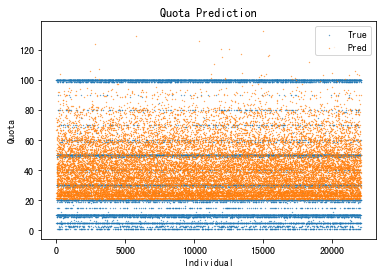

0.20544774848402203

In [200]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_yushan, Y_train_yushan)
Y_pred_yushan = model.predict(X_valid_yushan)
plt.scatter(range(len(Y_pred_yushan)), Y_valid_yushan, s=0.1, label='True')
plt.scatter(range(len(Y_pred_yushan)), Y_pred_yushan, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_yushan = Y_pred_yushan - Y_valid_yushan
np.linalg.norm(Y_diff_yushan) / len(Y_diff_yushan)

# Random Foreset

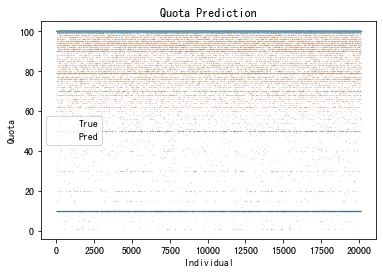

/Users/jack/miniconda3/envs/datasci/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


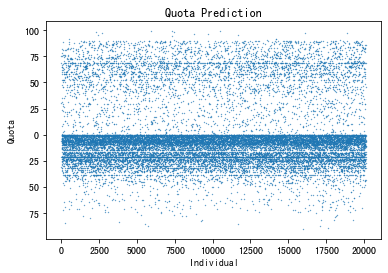

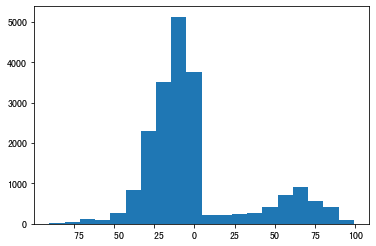

0.22906567093256455

In [201]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_fugle, Y_train_fugle)
Y_pred_fugle = model.predict(X_valid_fugle).astype(int)

plt.scatter(range(len(Y_pred_fugle)), Y_valid_fugle, s=0.01, label='True')
plt.scatter(range(len(Y_pred_fugle)), Y_pred_fugle, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_fugle = Y_pred_fugle - Y_valid_fugle
plt.scatter(range(len(Y_diff_fugle)), Y_diff_fugle, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
# plt.legend()
plt.show()
plt.close()

plt.hist(Y_diff_fugle, bins=20)
plt.show()
plt.close()

np.linalg.norm(Y_diff_fugle) / len(Y_diff_fugle)

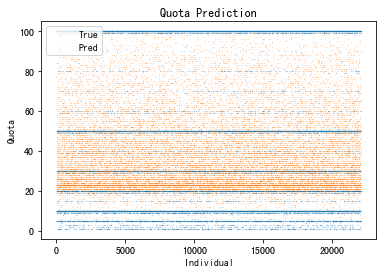

/Users/jack/miniconda3/envs/datasci/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


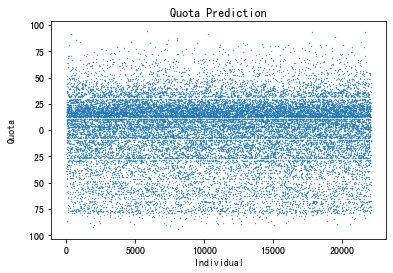

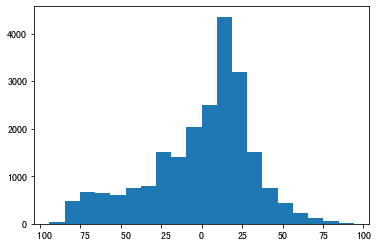

0.2148992494690477

In [202]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_yushan, Y_train_yushan)
Y_pred_yushan = model.predict(X_valid_yushan).astype(int)

plt.scatter(range(len(Y_pred_yushan)), Y_valid_yushan, s=0.01, label='True')
plt.scatter(range(len(Y_pred_yushan)), Y_pred_yushan, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()
plt.close()

Y_diff_yushan = Y_pred_yushan - Y_valid_yushan
plt.scatter(range(len(Y_diff_yushan)), Y_diff_yushan, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
# plt.legend()
plt.show()
plt.close()

plt.hist(Y_diff_yushan, bins=20)
plt.show()
plt.close()

np.linalg.norm(Y_diff_yushan) / len(Y_diff_yushan)